<a href="https://colab.research.google.com/github/Thiago-Cassiano/Machine-Learning-project1/blob/main/Projeto_Doencas_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Prever doenças cardiacas em um paciente usando machine learning

Esse notebook utiliza diversos métodos de machine learning baseados em Python para prever se um individuo tem doenças cardíacas baseada em atributos médicos

Passos:

* Análise exploratória de dados (EDA) - 
processo de analisar um conjunto de dados e descobrir mais sobre ele.
* Treinamento do modelo - 
Criação de modelos para aprender a prever uma variável de destino com base em outras variáveis.
* Avaliação do modelo - 
Avaliar as previsões dos modelos usando métricas de avaliação específicas do problema.
* Comparação de modelos - 
Comparar vários modelos diferentes para encontrar o melhor.
* Ajuste fino do modelo - 
Depois de encontrar um bom modelo, como podemos melhorá-lo?
* Validação cruzada - 
Se construirmos um bom modelo, podemos ter certeza de que funcionará em dados não vistos?


# 1. Definição do Problema
Em nosso caso, o problema que exploraremos é a classificação binária (uma amostra só pode ser uma de duas coisas).

Isso ocorre porque usaremos vários recursos diferentes (informações) sobre uma pessoa para prever se ela tem doenças cardíacas ou não.

Em um comunicado,

Dados os parâmetros clínicos de um paciente, podemos prever se ele tem ou não doença cardíaca?

# 2. Dados
Mergulhar nos dados nos quais sua definição de problema se baseia. Isso pode envolver sourcing, definir parâmetros diferentes, conversar com especialistas sobre o assunto e descobrir o que você deve esperar.

Os dados originais vieram do banco de dados de Cleveland do UCI Machine Learning Repository.

O banco de dados original contém 76 atributos, mas aqui apenas 14 atributos serão usados. Atributos (também chamados de recursos) são as variáveis ​​que usaremos para prever nossa variável de destino.

Atributos e recursos também são chamados de variáveis ​​independentes e uma variável de destino pode ser chamada de variável dependente.

Usamos as variáveis ​​independentes para prever nossa variável dependente.

Ou, em nosso caso, as variáveis ​​independentes são atributos médicos diferentes de um paciente e a variável dependente é se ele tem ou não doença cardíaca.

# 3. Avaliação
A métrica de avaliação é algo que você pode definir no início de um projeto.
Como o aprendizado de máquina é muito experimental, você pode dizer algo como:

Se pudermos atingir 95% de precisão na previsão se um paciente tem ou não doença cardíaca durante a prova de conceito, continuaremos com este projeto.

# 4. Recursos
Os recursos são partes diferentes dos dados.

Uma das maneiras mais comuns de fazer isso é criar um dicionário de dados.

A seguir estão os recursos que usaremos para prever nossa variável-alvo (doença cardíaca ou nenhuma doença cardíaca).

1. idade - idade em anos
2. sexo - (1 = masculino; 0 = feminino)
3. cp - tipo de dor no peito
    * 0: Angina típica: dor no peito relacionada à diminuição do suprimento de sangue ao coração
    * 1: Angina atípica: dor no peito não relacionada ao coração
    * 2: Dor não anginosa: tipicamente espasmos esofágicos (não relacionados ao coração)
    * 3: Assintomático: dor no peito sem sinais de doença
4. trestbps - pressão arterial em repouso (em mm Hg na admissão ao hospital)
    * qualquer coisa acima de 130-140 é normalmente motivo de preocupação
5. col - colesterol sérico em mg / dl
    * soro = LDL + HDL + .2 * triglicerídeos
    * acima de 200 é motivo de preocupação
6. fbs - (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)
    * '> 126' mg / dL sinaliza diabetes
7. restecg - resultados eletrocardiográficos em repouso
    * 0: Nada a notar
    * 1: Anormalidade da onda ST-T
        - pode variar de sintomas leves a problemas graves
        - sinaliza batimento cardíaco anormal
    * 2: Hipertrofia ventricular esquerda possível ou definitiva
        - Câmara de bombeamento principal do coração ampliado
8. thalach - frequência cardíaca máxima alcançada
9. exang - angina induzida por exercício (1 = sim; 0 = não)
10. oldpeak - depressão de ST induzida por exercícios em relação ao repouso
    * olha para o estresse do coração durante o exercício
    * coração doentio irá estressar mais
11. slope - a inclinação do segmento ST de pico do exercício
    * 0: Upsloping: melhor frequência cardíaca com exercício (incomum)
    * 1: Flatsloping: mudança mínima (coração saudável típico)
    * 2: Downslopins: sinais de coração doentio
12. ca - número de vasos principais (0-3) coloridos por fluorosopia
    * vaso colorido significa que o médico pode ver o sangue passando
    * quanto mais circulação sanguínea, melhor (sem coágulos)
13. thal - resultado de estresse com tálio
    * 1,3: normal
    * 6: defeito corrigido: costumava ser defeito, mas agora está bem
    * 7: defeito reversível: nenhum movimento sanguíneo adequado durante o exercício
14. target - tem doença ou não (1 = sim, 0 = não) (= o atributo previsto)

** Nota: ** Nenhuma informação de identificação pessoal (PPI) pode ser encontrada no conjunto de dados.

In [ ]:
# Preparando as ferramentas

# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Avaliação de modelos
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Carregando dados
df = pd.read_csv('https://raw.githubusercontent.com/Thiago-Cassiano/Machine-Learning-project1/main/project/data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Análise exploratória de dados

Depois de importar um conjunto de dados, a próxima etapa é explorar.

1. Que pergunta (s) você está tentando resolver (ou provar que está errado)?
2. Que tipo de dados você possui e como trata os diferentes tipos?
3. O que está faltando nos dados e como você lida com isso?
4. Onde estão os outliers e por que você deve se preocupar com eles?
5. Como você pode adicionar, alterar ou remover recursos para obter mais de seus dados?

In [ ]:
# Quantos valores positivos e negativos há?

df.iloc[:,-1].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

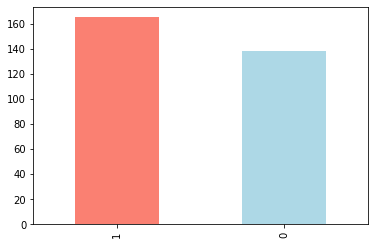

In [ ]:
# Visualização dos valores "Alvo"

df.iloc[:,-1].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [ ]:
# Verificando o número de valores faltantes, neste caso não há

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Diferentes metricas para visualização rápida

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


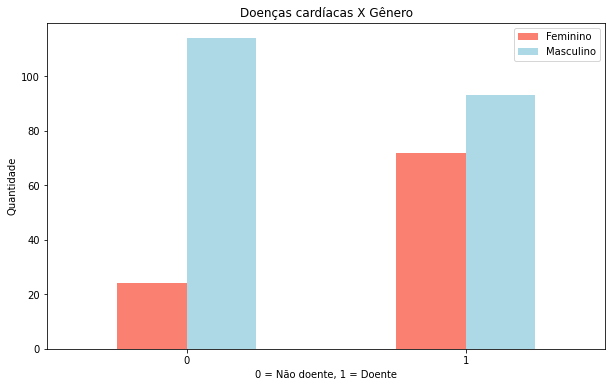

In [ ]:
# Comaparando a frequencia de doenças cardíacas por genero

pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

plt.title('Doenças cardíacas X Gênero')
plt.xlabel('0 = Não doente, 1 = Doente')
plt.ylabel('Quantidade')
plt.legend(['Feminino', 'Masculino'])
plt.xticks(rotation=0);

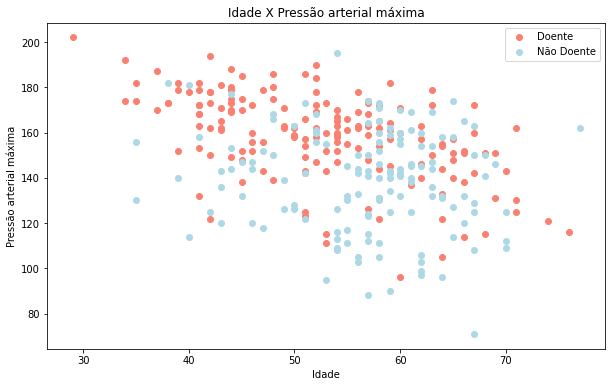

In [ ]:
# Idade X Pressão arterial máxima

plt.figure(figsize=(10,6))

# Exemplos positivos
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='Salmon')

# Exemplos negativos
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.title('Idade X Pressão arterial máxima')
plt.xlabel('Idade')
plt.ylabel('Pressão arterial máxima')
plt.legend(['Doente', 'Não Doente']);

O que podemos inferir disso?

Parece que quanto mais jovem alguém é, mais alta é a frequência cardíaca máxima (os pontos são mais altos à esquerda do gráfico). Mas isso pode ser porque há mais pontos todos juntos no lado direito do gráfico (participantes mais velhos).

Ambos são observacionais, é claro, mas é isso que estamos tentando fazer, construir uma compreensão dos dados.

Vamos verificar a distribuição de idade. 

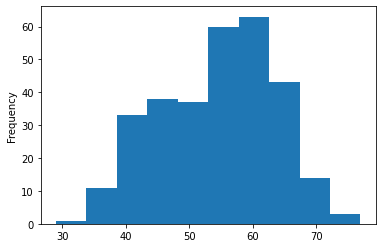

In [ ]:
df.age.plot.hist();

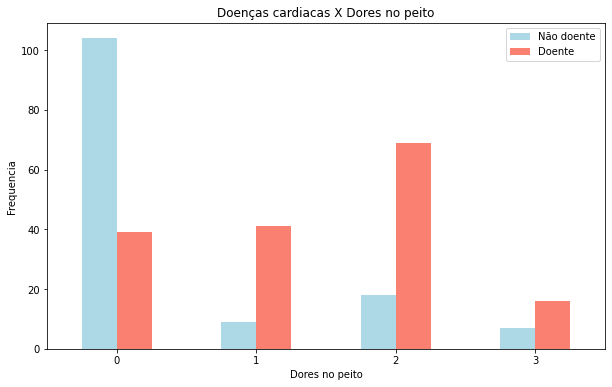

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['lightblue', 'salmon'])

plt.title('Doenças cardiacas X Dores no peito')
plt.xlabel('Dores no peito')
plt.ylabel('Frequencia')
plt.legend(['Não doente', 'Doente'])
plt.xticks(rotation=0);

3. cp - tipo de dor no peito
     * 0: Angina típica: dor no peito relacionada à diminuição do suprimento de sangue ao coração
     * 1: Angina atípica: dor no peito não relacionada ao coração
     * 2: Dor não anginosa: tipicamente espasmos esofágicos (não relacionados ao coração)
     * 3: Assintomático: dor no peito sem sinais de doença 

In [ ]:
# correlation matrix - Tabela que demonstra o quão correlacionados estão as variaveis uma das outras
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


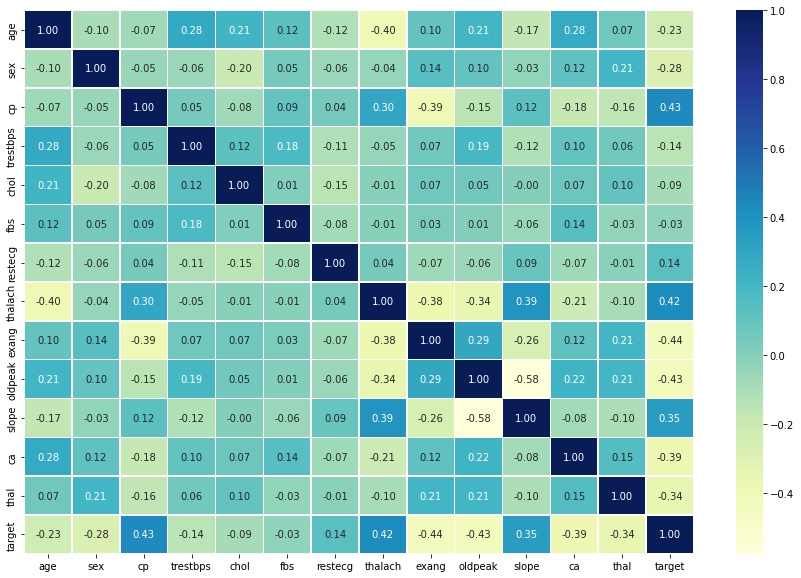

In [ ]:
 corr_matrix = df.corr()
 plt.figure(figsize=(15,10))
 sns.heatmap(corr_matrix,
             annot=True,
             linewidths=0.5,
             fmt='.2f',
             cmap='YlGnBu');

Um valor positivo mais alto significa uma correlação positiva potencial (aumento) e um valor negativo mais alto significa uma correlação negativa potencial (diminuição). 

## 5. Modelagem

Exploramos os dados, agora tentaremos usar machine learning para prever nossa variável de destino com base nas 13 variáveis independentes.

> Dados os parâmetros clínicos de um paciente, podemos prever se ele tem ou não doença cardíaca?

Tentaremos atingir 95% de precisão na previsão se um paciente tem ou não doença cardíaca.

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Selecionando tudo menos o alvo
X = df.iloc[:,:-1]
# Selecionando o alvo
y = df.iloc[:,-1]

In [ ]:
# dividingo os dados para treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Colocando modelos em um dicionario

models = {'Random Forest': RandomForestClassifier(),
          'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression()}

# Criando uma função 
def fit_and_score(models, X_train, X_test, y_train, y_test):
  # Lista para guardar o resultado dos modelos
  model_scores = {}
  # Loop através dos modelos
  for nome, modelo in models.items():
    # Ajustando o modelo aos dados
    modelo.fit(X_train, y_train)
    # Avaliação do modelo e inserção na lista
    model_scores[nome] = modelo.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.8032786885245902,
 'Random Forest': 0.8032786885245902}

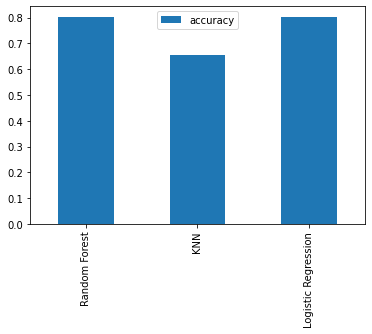

In [ ]:
pd.DataFrame(model_scores, index=['accuracy']).T.plot.bar();

## Hiperparametrização

* [** Confusion matrix **] - Compara os valores previstos com os valores verdadeiros de forma tabular, se 100% correto, todos os valores na matriz serão da esquerda para a direita inferior (linha de diagnóstico).
* [** Cross-validation **] - Divide seu conjunto de dados em várias partes, treina e testa seu modelo em cada parte e avalia o desempenho como um média.
* [** Precision **] - Proporção de verdadeiros positivos sobre o número total de amostras. Uma precisão mais alta leva a menos falsos positivos.
* [** Recall **] - Proporção de verdadeiros positivos sobre o número total de verdadeiros positivos e falsos negativos. Uma recordação mais alta leva a menos falsos negativos.
* [** F1 score **] - Combina precisão e recall em uma métrica. 1 é o melhor, 0 é o pior.
* [** Classification report **] - Sklearn tem uma função integrada chamada `classificação_report ()` que retorna algumas das principais métricas de classificação, como precisão, recall e pontuação f1.
* [** Curva ROC **] - [Receiver Operating Characterisitc] é um gráfico da taxa de verdadeiro positivo versus taxa de falso positivo.
* [** Area Under Curve (AUC) **] - A área abaixo da curva ROC. Um modelo perfeito atinge uma pontuação de 1,0. 

In [ ]:
# KNeighborsClassifier
train_scores = []
test_scores = []

# criando uma lista de 1 a 20 para n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

Pontuação máxima do modelo KNN com os dados de teste: 70.49%


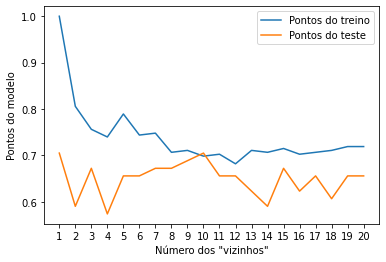

In [ ]:
plt.plot(neighbors, train_scores, label='Pontos do treino')
plt.plot(neighbors, test_scores, label='Pontos do teste')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Número dos "vizinhos"')
plt.ylabel('Pontos do modelo')
plt.legend()

print(f'Pontuação máxima do modelo KNN com os dados de teste: {max(test_scores)*100:.2f}%')

In [ ]:
# Hyperparametros diferentes para LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Hyperparametros diferentes para RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [ ]:
# Setup hyperparametros aleatorios para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [ ]:
rs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [ ]:
# Hyperparametrização aleatoria para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 160}

In [ ]:
rs_rf.score(X_test, y_test)

0.7868852459016393

O ajuste dos hiperparâmetros para cada modelo obteve um ligeiro aumento de desempenho em `RandomForestClassifier` e` LogisticRegression`.

* `RandomizedSearchCV` - tenta combinações de hiperparâmetros com` n_iter` e salva o melhor.
* `GridSearchCV` - tenta cada combinação de hiperparâmetros e salva o melhor.

In [ ]:
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,cv=5, verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [ ]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test,y_test)

0.819672131147541

## Avaliando um modelo de classificação, além da precisão

Agora que temos um modelo ajustado, vamos obter algumas das métricas.

* Curva ROC e pontuação AUC - [`plot_roc_curve()`]
* Matriz de confusão - [`confusion_matrix()`]
* Relatório de classificação - [`classification_report()`]
* Precisão - [`precision_score()`]
* Recall - [`recall_score()`]
* Pontuação F1 - [`f1_score()`]

In [ ]:
y_preds = gs_log_reg.predict(X_test)

### Curva ROC e pontuações AUC

ROC é uma maneira de compreender o desempenho do seu modelo, comparando a taxa de verdadeiro positivo com a taxa de falso positivo.

> Para obter um exemplo apropriado considere um teste diagnóstico que visa determinar se uma pessoa tem uma determinada doença. Um falso positivo, nesse caso, ocorre quando o teste da pessoa é positivo, mas na verdade não tem a doença. Um falso negativo, por outro lado, ocorre quando a pessoa dá negativo, sugerindo que ela é saudável, quando na verdade ela tem a doença.

Lendo a documentação sobre a função [`plot_roc_curve`] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html), podemos ver que leva` (estimador, X, y) ` como entradas. Onde `estiamator` é um modelo de aprendizado de máquina ajustado e` X` e `y` são os dados de teste.

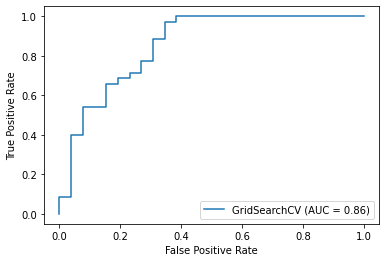

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gs_log_reg, X_test, y_test);

Isso é ótimo, o modelo se sai muito melhor do que adivinhar qual seria uma linha que vai do canto inferior esquerdo ao canto superior direito, AUC = 0,5. Mas um modelo perfeito alcançaria uma pontuação de AUC de 1.0, então ainda há espaço para melhorias.

### Matriz de confusão

Uma matriz de confusão é uma forma visual de mostrar onde seu modelo fez as previsões certas e onde fez as previsões erradas (ou em outras palavras, ficou confuso).

Scikit-Learn nos permite criar uma matriz de confusão usando [`confused_matrix ()`] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) e passando os rótulos verdadeiros e rótulos previstos. 

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[17  9]
 [ 2 33]]


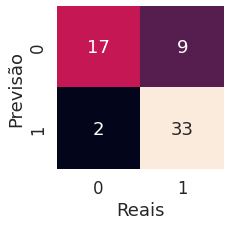

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True, cbar=False)
  
  plt.xlabel('Reais')
  plt.ylabel('Previsão')

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.79      0.94      0.86        35

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61



* ** Precisão ** - Indica a proporção de identificações positivas (classe 1 prevista pelo modelo) que estavam realmente corretas. Um modelo que não produz falsos positivos tem uma precisão de 1,0.
* ** Rechamada ** - Indica a proporção de positivos reais que foram classificados corretamente. Um modelo que não produz falsos negativos tem um recall de 1.0.
* ** Pontuação F1 ** - Uma combinação de precisão e recuperação. Um modelo perfeito atinge uma pontuação F1 de 1,0.
* ** Suporte ** - O número de amostras em que cada métrica foi calculada.
* ** Precisão ** - A precisão do modelo na forma decimal. A precisão perfeita é igual a 1,0.
* ** Macro avg ** - abreviação de macro média, a precisão média, recall e pontuação F1 entre as classes. Macro avg não classifica desequilíbrio em esforço, então se você tiver desequilíbrios de classe, preste atenção a esta métrica.
* ** Média ponderada ** - abreviação de média ponderada, a precisão da média ponderada, recall e pontuação F1 entre as classes. Ponderado significa que cada métrica é calculada com relação a quantas amostras existem em cada classe. Esta métrica favorecerá a classe majoritária (por exemplo, dará um valor alto quando uma classe supera a outra devido a ter mais amostras).

`cross_val_score ()` funciona pegando um estimador (modelo de aprendizado de máquina) junto com dados e rótulos. Em seguida, ele avalia o modelo de aprendizado de máquina nos dados e rótulos usando validação cruzada e um parâmetro de `pontuação` definido.

In [ ]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [ ]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [ ]:
# Pegando a média
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0.834808743169399

In [ ]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')

In [ ]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')

In [ ]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')

In [ ]:
# Estabelecendo as médias
cv_acc = np.mean(cv_acc)
cv_precision = np.mean(cv_precision)
cv_recall = np.mean(cv_recall)
cv_f1 = np.mean(cv_f1)

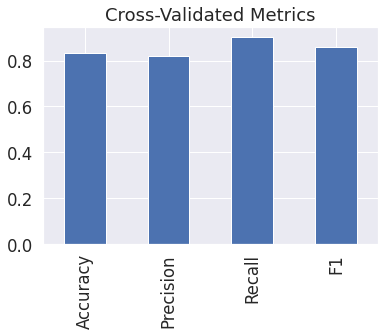

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Metrics', legend=False);

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)